# House-Price-Prediction use Linear Regression

此檔案使用scikit-learn 機器學習套件裡的linear regression演算法，來達成波士頓房地產價錢預測

    Objectives:
    1. Predict the sale price for each house.
    2. Minimize the difference between predicted and actual rating (RMSE/MSE)

    資料集：波士頓房產
    特徵：房地產客觀數據，如年份、平面大小
    預測目標：房地產價格
    機器學習方法：線性迴歸

In [34]:
%matplotlib inline
from sklearn import datasets #用來匯入內建之波士頓房地產資料庫
from sklearn.model_selection import cross_val_score #使用交叉驗證用來評估辨識準確度
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn import linear_model #線性分析之模組
import matplotlib.pyplot as plt #用來繪製影像
from sklearn.externals import joblib
import seaborn as sns
import pandas as pd
import numpy as np

## 1. 讀取資料


In [155]:
data=pd.read_csv('Boston.csv',index_col=0)
print(data.shape)
x=data.drop(['medv'], axis=1)
y=data['medv']
data.head(10)

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [156]:
y.head()

1    24.0
2    21.6
3    34.7
4    33.4
5    36.2
Name: medv, dtype: float64

    #uncomment to use load_boston()
    boston = datasets.load_boston()
    print(boston.data.shape)
    boston['feature_names']
    boston['target']
    import pandas as pd
    x = pd.DataFrame(boston['data'], columns=boston['feature_names'])
    y = pd.DataFrame(boston['target'],columns=['target'])
    data = pd.concat([x,y], axis=1)

## 1-1 基本資料分析

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [158]:
nan_rows=data.iloc[np.where(data.isnull())]
print(nan_rows)
#data=data.fillna(0)

Empty DataFrame
Columns: []
Index: []


In [159]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [160]:
data['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

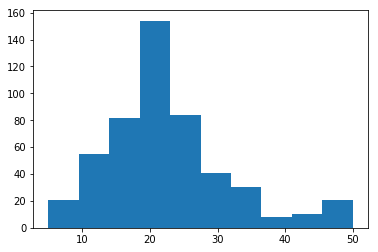

In [161]:
plt.hist(data['medv'])

###  correlation matrix  
 The correlation coefficient has values between -1 to 1.

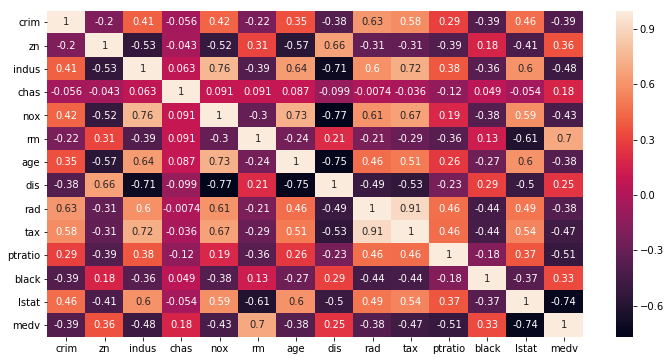

In [162]:
import seaborn as sns
plt.figure(figsize = (12,6))
sns.heatmap(data.corr(),annot = True)

### remove some columns

In [163]:
#x.drop(['CRIM','ZN'],axis=1,inplace = True)

In [164]:
x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [165]:
y.head()

1    24.0
2    21.6
3    34.7
4    33.4
5    36.2
Name: medv, dtype: float64

## 2. 切分訓練集與測試集 
    train_test_split()

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

## 3. 模型配適
    https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
    
$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{2}+w_{3}x_{3}+w_{4}x_{4}+...+w_{13}x_{13}+b$$

In [47]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train) 
print('Coefficients: ', lr.coef_)
print('interception: ', lr.intercept_)

Coefficients:  [-1.30799852e-01  4.94030235e-02  1.09535045e-03  2.70536624e+00
 -1.59570504e+01  3.41397332e+00  1.11887670e-03 -1.49308124e+00
  3.64422378e-01 -1.31718155e-02 -9.52369666e-01  1.17492092e-02
 -5.94076089e-01]
interception:  37.91248700974999


## 4.預測

In [48]:
def lr_predict(lr,x):
    W=lr.coef_
    b=lr.intercept_
    return np.dot(x,W.T)+b
    
lr_predict(lr,X_train[9:10])

array([24.64473374])

In [49]:
#使用sklearn function : predict()
predicted=lr.predict(X_train)
print(predicted[:10])
print('-'*20)
predict_y=lr.predict(X_train[9:10])
print(predict_y)

[13.82876985 44.52852811  3.91599095 22.37795855 18.23592252 25.52374759
 29.43974677 18.69453347 27.85646296 24.64473374]
--------------------
[24.64473374]


## 5.評估模型 

In [50]:

print("mse of training data:",mean_squared_error(lr.predict(X_train), y_train))
print("mse of test data:",mean_squared_error(lr.predict(X_test), y_test))

#R2 score for regression
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)

mse of training data: 22.477090408387628
mse of test data: 20.86929218377072
linear regression train score: 0.738339392059052
linear regression test score: 0.7334492147453087


### 6. 儲存/匯出模型
    joblib.dump將線性回歸預測器匯出為pkl檔。


In [51]:
from sklearn.externals import joblib
joblib.dump(lr,"./lr_machine.pkl")


['./lr_machine.pkl']

### 匯入模型
    joblib.load 將線性回歸預測器匯入

In [52]:
#lr=joblib.load("./lr_machine.pkl")

## 7. 繪圖
   
   繪出預測結果與實際目標差異圖

In [53]:
def scatter_plot(predict_data, actual_data,size):
    plt.title('scatter plot',fontsize='large') #set title
    #plt.scatter(np.arange(size),actual_data,label='real y')  #set size : s=3; 
    #plt.scatter(np.arange(size),predict_data,label='predicted y')
    #plt.legend(loc='lower right')
    plt.scatter(actual_data,predict_data)
    plt.plot([actual_data.min(), actual_data.max()], [actual_data.min(), actual_data.max()], 'r', lw=2)
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.grid(b=True, linewidth=0.3)
    print("size:",size)
    print("mse:",mean_squared_error(predict_data, actual_data))

size: 404
mse: 22.477090408387628


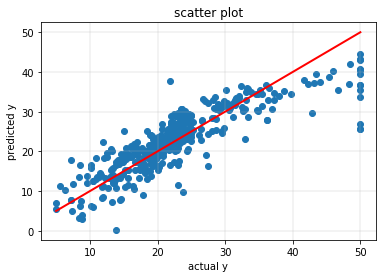

In [54]:
#ploting for all training data 
scatter_plot(lr.predict(X_train),y_train,len(y_train))

size: 30
mse: 37.42470628175811


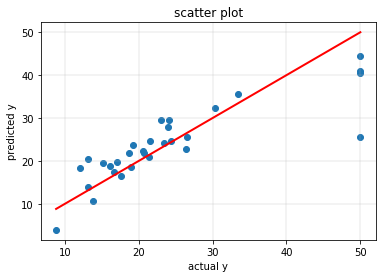

In [55]:
#ploting for training data 
scatter_plot(lr.predict(X_train[:30]),y_train[:30],len(y_train[:30]))

size: 102
mse: 20.86929218377072


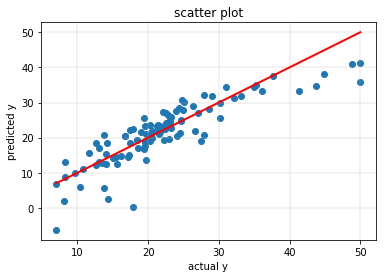

In [56]:
#ploting for test data 
scatter_plot(lr.predict(X_test),y_test,len(y_test))

5.0
50.0


Text(0, 0.5, 'Real')

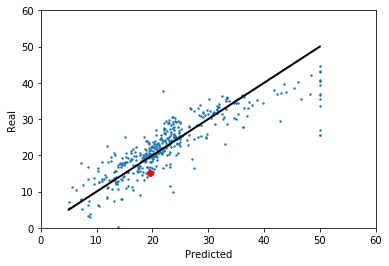

In [57]:
predicted=lr.predict(X_train)
predict_y=lr.predict(x[451:452])
plt.scatter(y_train,predicted,s=2)
#plt.plot(predicted,y[:450],'b')
plt.plot(predict_y, y[451:452], 'ro')
# 劃出一條斜率=1 (即 x=y)的理想曲線(用虛線標示)。
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=2)
print(y.min())
print(y.max())
#----
# X    Y
# min min  (first point)
# max max  (second point)
plt.xlim(0,60)
plt.ylim(0,60)
#plt.legend(loc='lower right')
plt.xlabel('Predicted')
plt.ylabel('Real')

In [356]:
error.shape

(102,)

0.5828212479838503
4.53096144065134


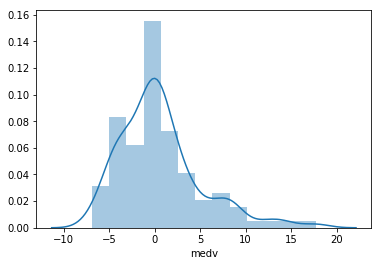

In [58]:
predictions=lr.predict(X_test)
error = y_test - predictions
print(np.mean(error))
print(np.std(error))
sns.distplot(error)  #誤差分佈 16%最多


## Exercise 1: 有無做Standardization有差異嗎?

####  Rescale data : standardization( z-score)

In [304]:
from sklearn.preprocessing import StandardScaler

X_train=X_train.astype(np.float64) #avoid warning
X_test=X_test.astype(np.float64)
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[3.55081183e+00 1.19034653e+01 1.08451238e+01 6.93069307e-02
 5.51575990e-01 6.28845545e+00 6.77212871e+01 3.83331658e+00
 9.52970297e+00 4.05123762e+02 1.84250000e+01 3.58796856e+02
 1.24780446e+01]
[8.67758770e+00 2.34428014e+01 6.72896364e+00 2.53975353e-01
 1.14580700e-01 6.92073009e-01 2.83010433e+01 2.05369117e+00
 8.68831062e+00 1.68130090e+02 2.19033515e+00 8.89379943e+01
 7.02985838e+00]


In [305]:
#transform: (x-u)/std.
# applying column standardization on train and test data
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
print(X_train_std[:5])

[[-2.76469903e-01 -5.07766334e-01 -4.02011945e-01 -2.72888411e-01
  -1.18484091e-01 -8.48834498e-01  9.63876582e-01 -2.24554621e-02
  -6.36453185e-01 -5.83618091e-01  1.17561917e+00 -3.01968083e-04
   8.35287872e-01]
 [-4.07463681e-01  3.33136528e+00 -1.43188822e+00  3.66450153e+00
  -1.31414794e+00  2.36180942e+00 -1.51659735e+00  9.99022369e-01
  -9.81744707e-01 -1.23192560e+00 -2.20285923e+00  4.12907260e-01
  -1.32549534e+00]
 [ 8.06483214e+00 -5.07766334e-01  1.07815655e+00 -2.72888411e-01
   1.11208965e+00 -4.78931328e-01  1.14054851e+00 -9.88813029e-01
   1.66549030e+00  1.55163325e+00  8.10378266e-01 -3.84927565e+00
   1.15819623e+00]
 [-4.03976537e-01 -5.07766334e-01  1.61224862e-01 -2.72888411e-01
   1.86977475e-01 -2.43407044e-01  3.17257310e-01 -7.52701579e-01
  -9.81744707e-01 -7.85842452e-01  1.17561917e+00  4.28423688e-01
  -4.83373117e-01]
 [ 6.96610438e-01 -5.07766334e-01  1.07815655e+00 -2.72888411e-01
   1.23427427e+00  1.66954285e-01  1.14054851e+00 -1.06847447e+00


In [306]:
print(X_train.values[:5])

[[1.15172e+00 0.00000e+00 8.14000e+00 0.00000e+00 5.38000e-01 5.70100e+00
  9.50000e+01 3.78720e+00 4.00000e+00 3.07000e+02 2.10000e+01 3.58770e+02
  1.83500e+01]
 [1.50100e-02 9.00000e+01 1.21000e+00 1.00000e+00 4.01000e-01 7.92300e+00
  2.48000e+01 5.88500e+00 1.00000e+00 1.98000e+02 1.36000e+01 3.95520e+02
  3.16000e+00]
 [7.35341e+01 0.00000e+00 1.81000e+01 0.00000e+00 6.79000e-01 5.95700e+00
  1.00000e+02 1.80260e+00 2.40000e+01 6.66000e+02 2.02000e+01 1.64500e+01
  2.06200e+01]
 [4.52700e-02 0.00000e+00 1.19300e+01 0.00000e+00 5.73000e-01 6.12000e+00
  7.67000e+01 2.28750e+00 1.00000e+00 2.73000e+02 2.10000e+01 3.96900e+02
  9.08000e+00]
 [9.59571e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.93000e-01 6.40400e+00
  1.00000e+02 1.63900e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.76110e+02
  2.03100e+01]]


In [307]:
lr2 = linear_model.LinearRegression()
lr2.fit(X_train_std, y_train) 
print('Coefficients: ', lr2.coef_)
print('interception: ', lr2.intercept_)

Coefficients:  [-1.13502719  1.15814527  0.00737057  0.68709635 -1.82837001  2.36271879
  0.03166538 -3.06632775  3.16621482 -2.21457852 -2.08600876  1.0449511
 -4.17627077]
interception:  22.646782178217823


In [310]:
print("mse of training data:",mean_squared_error(lr2.predict(X_train_std), y_train))
print("mse of test data:",mean_squared_error(lr2.predict(X_test_std), y_test))

#R2 score for regression
train_score=lr2.score(X_train_std, y_train)
test_score=lr2.score(X_test_std, y_test)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)

mse of training data: 22.477090408387628
mse of test data: 20.86929218377083
linear regression train score: 0.738339392059052
linear regression test score: 0.7334492147453073


In [351]:
def mse(predictions,y):
    m = len(y)
    cost = (1/m) * np.sum(np.square(predictions-y))
    return cost

def  cal_cost(W,X,y):
     
    predictions = X.dot(W)    
    return mse(predictions,y)

def gradient_descent(X,y,learning_rate=0.01,iterations=100):

    X = np.c_[np.ones((X.shape[0],1)),X]  # return a new X (add bias )
    theta = np.random.randn(X.shape[1],1)    
    return __gradient_descent(X,y,theta,learning_rate,iterations)

def __gradient_descent(X,y,theta,learning_rate=0.01,iterations=100):
    '''
    X    = Matrix of X with added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
   
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,len(theta)))
    s_gra = np.zeros(len(theta)).reshape(-1,1)
    print(theta_history.shape)
    print('X:',X.shape)
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        grad=X.T.dot(prediction - y)
        #print(s_gra.shape)
        #print((grad**2).shape)
        s_gra+=grad**2
        ada=np.sqrt(s_gra)
        theta = theta -learning_rate*grad/ada
        
        theta_history[it,:] =theta.T
        cost=cal_cost(theta,X,y)
        cost_history[it]  = cost
        print(cost)
        
    return theta, cost_history, theta_history
    

In [354]:
lr =0.1
n_iter = 20000
XX=X_train.values
yy=y_train.values.reshape(-1,1)
W,cost_history,theta_history = gradient_descent(XX,yy,lr,n_iter)
print('weight',W)
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

(20000, 14)
X: (404, 14)
94888.01525305968
80060.1746645547
72157.53186760968
67071.37615712278
63307.59381527866
60232.12915733036
57556.888554528414
55143.9321086076
52922.90126664113
50854.80583357946
48915.80437833351
47089.78185713946
45364.85246633683
43731.644855659724
42182.41656881181
40710.56690576095
39310.34918306337
37976.68784757085
36705.05397286143
35491.37535251643
34331.96843256954
33223.48487536011
32162.868452185765
31147.31955108396
30174.26549721901
29241.33543204964
28346.33884423406
27487.24707457154
26662.177275257618
25869.37841645173
25107.219016004557
24374.176330598213
23668.82679451998
22989.83752977862
22335.958780982404
21706.01715221909
21098.909542470235
20513.597691852483
19949.103263952005
19404.50340027021
18878.926691765082
18371.549519990567
17881.5927266727
17408.318575927136
16951.027977885613
16509.057946396508
16081.779266804873
15668.594352691762
15268.935272933559
14882.26193259076
14508.060393002073
14145.84131808561
13795.138535269323
1345

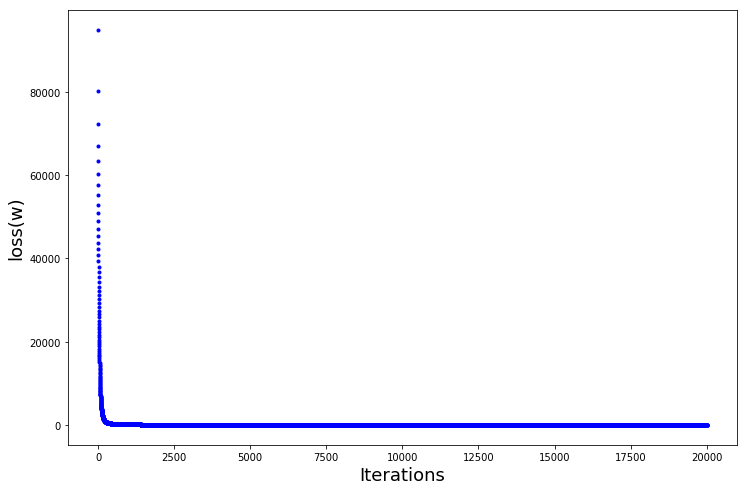

In [355]:
fig,ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('loss(w)',fontsize=18)
ax.set_xlabel('Iterations',fontsize=18)
_=ax.plot(range(n_iter),cost_history,'b.')

## (六) k-fold cross-validation : evaluating estimator performance
5-fold cross-validation: 將資料切分為5等份，以其中4等份為訓練集，另外1等份則為測試集。

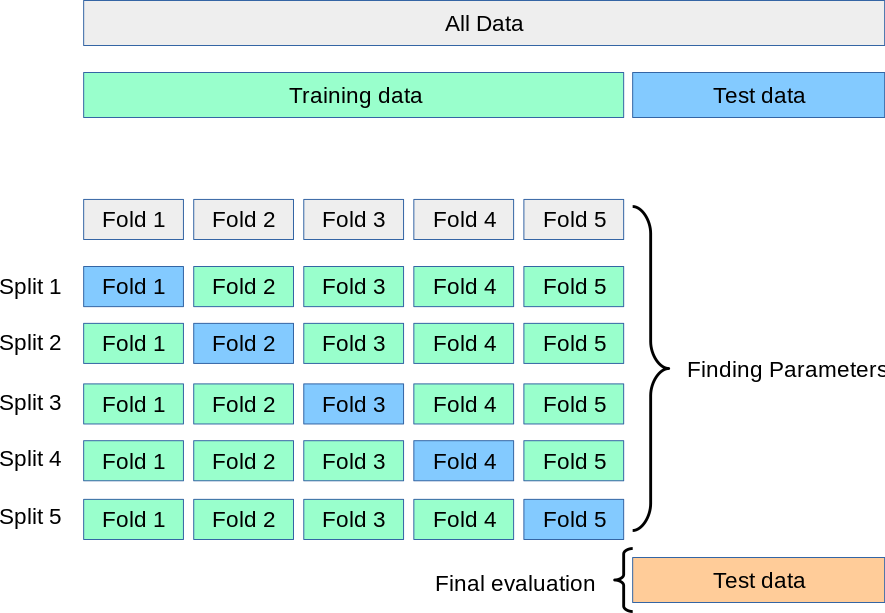
https://scikit-learn.org/stable/modules/cross_validation.html

In [31]:
cv_score=[]
lr_cv = linear_model.LinearRegression()

#1 : [:90] test ,[90:450] traing
lr_cv.fit(x[90:450], y[90:450]) 
cv_score.append(mean_squared_error(lr_cv.predict(x[:90]), y[:90]))

#2 : [90:180] test ,[0:90]+[180:450] traing
concate_x=np.concatenate((x[0:90], x[180:450]), axis=0)
concate_y=np.concatenate((y[0:90], y[180:450]), axis=0)
lr_cv.fit(concate_x, concate_y) 
cv_score.append(mean_squared_error(lr_cv.predict(x[90:180]), y[90:180]))

#3 : [180:270] test ,[0:180]+[270:450] traing
concate_x=np.concatenate((x[0:180], x[270:450]), axis=0)
concate_y=np.concatenate((y[0:180], y[270:450]), axis=0)
lr_cv.fit(concate_x, concate_y) 
cv_score.append(mean_squared_error(lr_cv.predict(x[180:270]), y[180:270]))

#4 : [270:360] test ,[0:270]+[360:450] traing
concate_x=np.concatenate((x[0:270], x[360:450]), axis=0)
concate_y=np.concatenate((y[0:270], y[360:450]), axis=0)
lr_cv.fit(concate_x, concate_y) 
cv_score.append(mean_squared_error(lr_cv.predict(x[270:360]), y[270:360]))

#5 : [360:450] test ,[0:360] traing
lr_cv.fit(x[0:360], y[0:360]) 
cv_score.append(mean_squared_error(lr_cv.predict(x[360:450]), y[360:450]))

cv_score=np.array(cv_score)
print(cv_score)
print(cv_score.mean())

[ 10.05907858  42.40990327  49.07926157  11.8049291  345.56084075]
91.78280265483045



  ### cross_val_score(estimator,x,y,cv)

    X:機器學習數據
    y:為回歸目標，
    cv:Cross-Validation. integer, to specify the number of folds in a (Stratified) K-Fold,
    
    Regression 常用MSE來評估好壞, MSE愈大, 愈不好,但在使用score object,我們期待
    分數愈高愈好, 所以加上負號 score=-MSE  
    from sklearn.metrics import make_scorer
    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    score=cross_val_score(lr, x[:450], y[:450],scoring=scorer, cv=10) 
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html

[ -30.09377616  -21.4968822    -6.44639163   -5.89567603   -0.98087062
   -0.70854728   -8.44504204   -8.18747635   -1.05081142   -9.37840323
   -9.10154749   -4.63200038  -21.49985231  -17.36578583   -0.76713265
   -4.84743892   -4.00390059  -15.88952546  -33.05910764  -20.39967717
   -2.59439818   -3.29284848  -13.86243927   -5.87094592   -3.74550282
   -1.17313605   -4.91117932   -2.18327752  -36.96558856  -35.59008208
  -12.40789957  -22.85832798  -85.76194033  -37.7664813   -21.62527275
   -9.53768504  -26.92643602  -46.38260245  -13.56024346  -25.20571373
  -34.43630427   -7.57081041  -49.23349124  -16.33331768  -23.87478092
  -48.37638874  -27.88091636  -16.96187982  -13.05903004  -12.33595545
  -53.16499066  -22.42126447  -15.42387933  -24.54568999  -33.80058138
   -6.27365829   -7.81049822  -10.31733006  -24.59544238  -12.49801048
  -14.4883305    -1.94981117  -36.5162514    -4.77488578  -22.99418792
  -16.0361644    -6.60108388   -1.89391422   -2.10914422   -2.68042052
   -5.

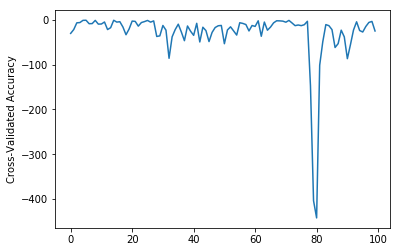

In [32]:
# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validated

#Evaluate a score by cross-validation

score=cross_val_score(lr, x[:450], y[:450],scoring='neg_mean_squared_error', cv=100) 
print(score)
print('mean score:',score.mean())
plt.plot(score)

plt.ylabel('Cross-Validated Accuracy')
plt.show()
